# Salary Estimation using K-Nearset Neighbour model

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np

#### Load dataset

In [3]:
dataset=pd.read_csv('adult.csv')

#### Summarize dataset

In [4]:
print(dataset.shape)
print(dataset.head(5))

(32561, 15)
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  U

#### Drop unncessary data column from Dataset

In [5]:
dataset.drop(labels=['workclass','fnlwgt','education','marital.status','occupation','relationship','race','sex','capital.loss','native.country'],axis=1,inplace=True)

#### Mapping Salary data to Binary value(0,1)

In [6]:
income_set=set(dataset['income'])
dataset['income']=dataset['income'].map({'<=50':0,'>50':1}).fillna(0).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       0
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


#### Segregate dataset into X(input/independent variable)and Y(output/dependent variable)

In [7]:
X=dataset.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [8]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 0, 0, 0])

#### Splitting dataset into train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#### Feature Scaling : test data should be completely new and a surprise set for our model

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#### Finding the Best K-value

Text(0, 0.5, 'Mean Error')

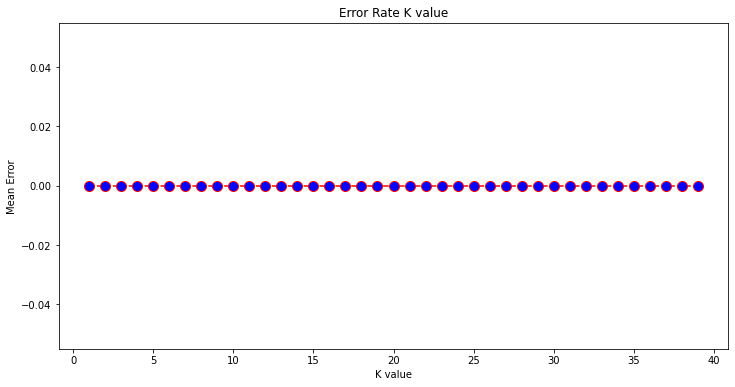

In [20]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#calculate error for K values between 1 to 40
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred_i=model.predict(X_test)
    error.append(np.mean(pred_i!=y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')



#### Training

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)
model.fit(X_train,y_train)

KNeighborsClassifier()

#### Predicting, whether new customer with age and salary will Buy or not

In [ ]:
age=int(input("Enter new employee's age:"))
edu=int(input("Enter new employee's education:"))
cg=int(input("Enter new employee's captial gain:"))
wh=int(input("Enter new employee's hours per week:"))
newEmp=[[age,edu,cg,wh]]
result= model.predict(sc.transform(newEmp))
print(result)

if result==1:
    print("Employee might got Salary above 50k")
else:
    print("Customer might not got Salary above 50k")
    

#### Prediction for all test data

In [ ]:
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

#### Evaluating model -CONFUSION MATRIX

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)

print("Confusion Matrix:")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix:
[[8141]]
Accuracy of the Model: 100.0%
